## **Online News Popularity Prediction Model**


**Name**: Joel Joshi

**Organisation:** Entri Elevate

**Date:**: 20/03/25

##  **1. Overview of Problem Statement**

The popularity of online news articles, often measured by the number of shares it receives, depends on various factors such as the article’s content, publication timing, and metadata. Predicting whether an article will become popular is a challenging yet valuable task for news publishers aiming to optimize their content strategies and boost reader engagement. This project leverages machine learning to address this problem using a dataset of online news articles.

## **2. Objective**

The goal of this project is to build an accurate machine learning model to predict whether an online news article will be popular, defined here as achieving a number of shares equal to or exceeding a threshold (e.g., 1400 shares), based on its features.

## **3. Data Description:**



The **Online News Popularity Dataset** contains various features related to articles published by **Mashable**. The objective is to predict the number of shares an article will receive based on its content characteristics, metadata, and social signals.

---

###  **Key Attributes and Description**

#### **1. URL & Temporal Features**
- `url`: The link to the news article.  
- `timedelta`: Days between the article's publication date and the dataset collection date.  
- **Purpose:**  
  - `timedelta` can capture the recency of the article, which may impact its popularity.

---

#### **2. Content-Based Features**
- `n_tokens_title`: Number of words in the article's title.  
- `n_tokens_content`: Number of words in the article's content.  
- `n_unique_tokens`: Ratio of unique words to total words in the content.  
- `n_non_stop_words`: Ratio of non-stopwords to total words.  
- `n_non_stop_unique_tokens`: Ratio of unique non-stopwords to total words.  
- **Purpose:**  
  - These features indicate the **content length** and **uniqueness**, which may influence popularity.

---

#### **3. Link and Media Features**
- `num_hrefs`: Number of hyperlinks in the article.  
- `num_self_hrefs`: Number of internal links (links to the same website).  
- `num_imgs`: Number of images embedded in the article.  
- `num_videos`: Number of videos embedded.  
- **Purpose:**  
  - Media-rich content with images and videos often attracts more attention and shares.

---

#### **4. Keyword and Topic Features**
- `num_keywords`: Number of keywords used for SEO optimization.  
- `data_channel_is_lifestyle`: 1 if the article is categorized under lifestyle, 0 otherwise.  
- `data_channel_is_entertainment`: 1 if categorized under entertainment.  
- `data_channel_is_bus`: 1 if categorized under business.  
- `data_channel_is_socmed`: 1 if categorized under social media.  
- `data_channel_is_tech`: 1 if categorized under technology.  
- `data_channel_is_world`: 1 if categorized under world news.  
- **Purpose:**  
  - These features represent **article categories**, which may impact the shareability.

---

#### **5. Keyword Statistics Features**
- `kw_min_min`: Minimum value of shares across keywords in the article.  
- `kw_max_min`: Maximum value of shares across keywords.  
- `kw_avg_min`: Average value of shares across keywords.  
- `kw_min_max`: Minimum value of shares across all articles containing the same keywords.  
- `kw_max_max`: Maximum value of shares across all articles with the same keywords.  
- `kw_avg_max`: Average value of shares across articles with the same keywords.  
- `kw_min_avg`: Minimum of average keyword shares.  
- `kw_max_avg`: Maximum of average keyword shares.  
- `kw_avg_avg`: Average of average keyword shares.  
- **Purpose:**  
  - These features capture **keyword effectiveness** in driving article popularity.

---

#### **6. Self-Reference Shares**
- `self_reference_min_shares`: Minimum shares for the article's referenced articles.  
- `self_reference_max_shares`: Maximum shares for the referenced articles.  
- `self_reference_avg_sharess`: Average shares for referenced articles.  
- **Purpose:**  
  - Helps identify whether **referencing popular articles** impacts the current article's popularity.

---

#### **7. Temporal Features**
- `weekday_is_monday`: 1 if the article was published on Monday, 0 otherwise.  
- `weekday_is_tuesday`: 1 if published on Tuesday.  
- `weekday_is_wednesday`: 1 if published on Wednesday.  
- `weekday_is_thursday`: 1 if published on Thursday.  
- `weekday_is_friday`: 1 if published on Friday.  
- `weekday_is_saturday`: 1 if published on Saturday.  
- `weekday_is_sunday`: 1 if published on Sunday.  
- `is_weekend`: 1 if published on the weekend, 0 otherwise.  
- **Purpose:**  
  - Allows the model to consider whether **posting day influences popularity**.

---

#### **8. Latent Dirichlet Allocation (LDA) Features**
- `LDA_00`: Topic 1 distribution score.  
- `LDA_01`: Topic 2 distribution score.  
- `LDA_02`: Topic 3 distribution score.  
- `LDA_03`: Topic 4 distribution score.  
- `LDA_04`: Topic 5 distribution score.  
- **Purpose:**  
  - These features represent the **topic distribution** of the article, indicating its thematic focus.

---

#### **9. Sentiment & Subjectivity Features**
- `global_subjectivity`: Average subjectivity of the article (0 = objective, 1 = highly subjective).  
- `global_sentiment_polarity`: Average sentiment polarity (-1 = negative, 1 = positive).  
- `global_rate_positive_words`: Rate of positive words in the content.  
- `global_rate_negative_words`: Rate of negative words.  
- `rate_positive_words`: Ratio of positive words to total words.  
- `rate_negative_words`: Ratio of negative words to total words.  
- `avg_positive_polarity`: Average polarity of positive words.  
- `min_positive_polarity`: Minimum polarity of positive words.  
- `max_positive_polarity`: Maximum polarity of positive words.  
- `avg_negative_polarity`: Average polarity of negative words.  
- `min_negative_polarity`: Minimum polarity of negative words.  
- `max_negative_polarity`: Maximum polarity of negative words.  
- `title_subjectivity`: Subjectivity of the article's title.  
- `title_sentiment_polarity`: Sentiment polarity of the title.  
- `abs_title_subjectivity`: Absolute value of the title's subjectivity.  
- `abs_title_sentiment_polarity`: Absolute value of the title's sentiment polarity.  
- **Purpose:**  
  - These features capture **sentiment and tone**, which may influence article popularity.

---

#### **10. Target Variable**
- `shares`: The number of times the article was shared on social media.  
- **Purpose:**  
  - This is the **target variable** for prediction.

---

###  **Key Insights from the Dataset**
- **Content length**, **media richness**, and **SEO keyword usage** play a vital role in determining popularity.  
- **Sentiment and subjectivity** features indicate whether emotional or factual content drives more shares.  
- The **weekday and weekend flags** allow for temporal trend analysis.


## **4. Data Collection:**

**Source**: UCI Machine Learning Repository

**Dataset-link**: https://archive.ics.uci.edu/dataset/332/online+news+popularity

## **5. Data Preprocessing**

### **Import all necessary libraries**

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
import joblib
from time import time
from scipy.stats import skew

In [14]:
# Load the dataset
data = pd.read_csv("OnlinePopularity_data.csv")
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [15]:
print("Dataset shape:", data.shape)

Dataset shape: (39644, 61)


In [16]:
data.info

<bound method DataFrame.info of                                                      url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.

In [17]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


 **2. Data Cleaning**

In [19]:
# Check for missing values
print("Total missing values:", data.isnull().sum().sum())  

Total missing values: 0


In [20]:
# Check for Duplicates
data.duplicated().sum()

0

In [21]:
# Extract features by dropping non-predictive columns
features_raw = data.drop(['url', ' timedelta', ' shares'], axis=1)
display(features_raw.head())


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [22]:
print(data.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [23]:
data.columns = data.columns.str.strip()

## **6. Exploratory Data Analysis (EDA)**

In [25]:
# Calculate skewness for each numerical feature
numerical_features = features_raw.select_dtypes(include=[np.number]).columns
skewness = features_raw[numerical_features].apply(skew)
skewness

n_tokens_title                     0.165314
n_tokens_content                   2.945310
n_unique_tokens                  198.647599
n_non_stop_words                 198.784924
n_non_stop_unique_tokens         198.435786
num_hrefs                          4.013343
num_self_hrefs                     5.172555
num_imgs                           3.946447
num_videos                         7.019267
average_token_length              -4.575838
num_keywords                      -0.147246
data_channel_is_lifestyle          3.992868
data_channel_is_entertainment      1.683521
data_channel_is_bus                1.876799
data_channel_is_socmed             3.758737
data_channel_is_tech               1.619914
data_channel_is_world              1.405116
kw_min_min                         2.374857
kw_max_min                        35.327097
kw_avg_min                        31.304924
kw_min_max                        10.385979
kw_max_max                        -2.644882
kw_avg_max                      

In [26]:
skewed_features = skewness[abs(skewness) > 1].index.sort_values(ascending=True)
skewed_features

Index([' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' abs_title_sentiment_polarity', ' average_token_length',
       ' data_channel_is_bus', ' data_channel_is_entertainment',
       ' data_channel_is_lifestyle', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world',
       ' global_rate_negative_words', ' global_subjectivity', ' is_weekend',
       ' kw_avg_avg', ' kw_avg_min', ' kw_max_avg', ' kw_max_max',
       ' kw_max_min', ' kw_min_max', ' kw_min_min', ' max_negative_polarity',
       ' min_positive_polarity', ' n_non_stop_unique_tokens',
       ' n_non_stop_words', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_imgs', ' num_self_hrefs', ' num_videos',
       ' rate_positive_words', ' self_reference_avg_sharess',
       ' self_reference_max_shares', ' self_reference_min_shares',
       ' weekday_is_friday', ' weekday_is_monday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' weekday_is_thursday', ' weekda

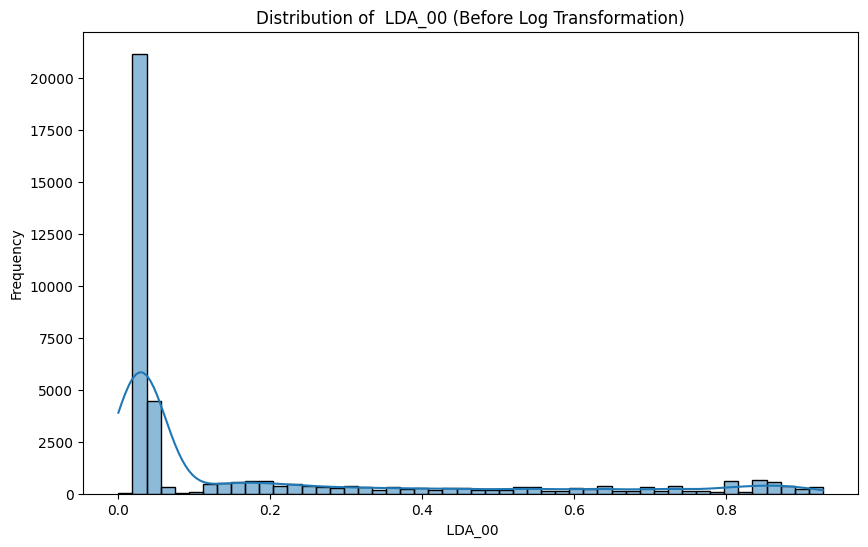

In [27]:
# Visualize a sample skewed feature before transformation
if len(skewed_features) > 0:
    sample_feature = skewed_features[0]
    plt.figure(figsize=(10, 6))
    sns.histplot(features_raw[sample_feature], bins=50, kde=True)
    plt.title(f'Distribution of {sample_feature} (Before Log Transformation)')
    plt.xlabel(sample_feature)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
# Apply log1p transformation to skewed features
# Apply log1p only to non-negative values
for feature in skewed_features:
    features_raw[feature] = np.log1p(np.maximum(features_raw[feature], 0))


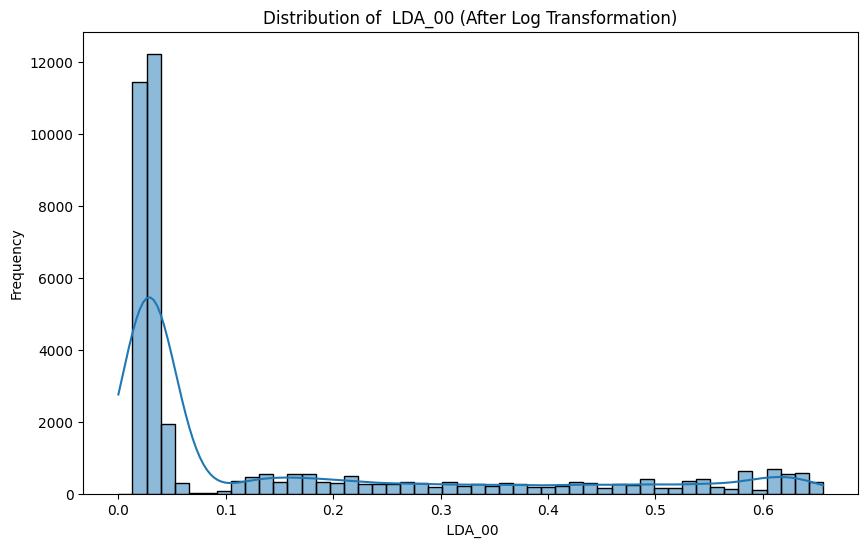

In [29]:
# Visualize the same sample feature after transformation
if len(skewed_features) > 0:
    plt.figure(figsize=(10, 6))
    sns.histplot(features_raw[sample_feature], bins=50, kde=True)
    plt.title(f'Distribution of {sample_feature} (After Log Transformation)')
    plt.xlabel(sample_feature)
    plt.ylabel('Frequency')
    plt.show()

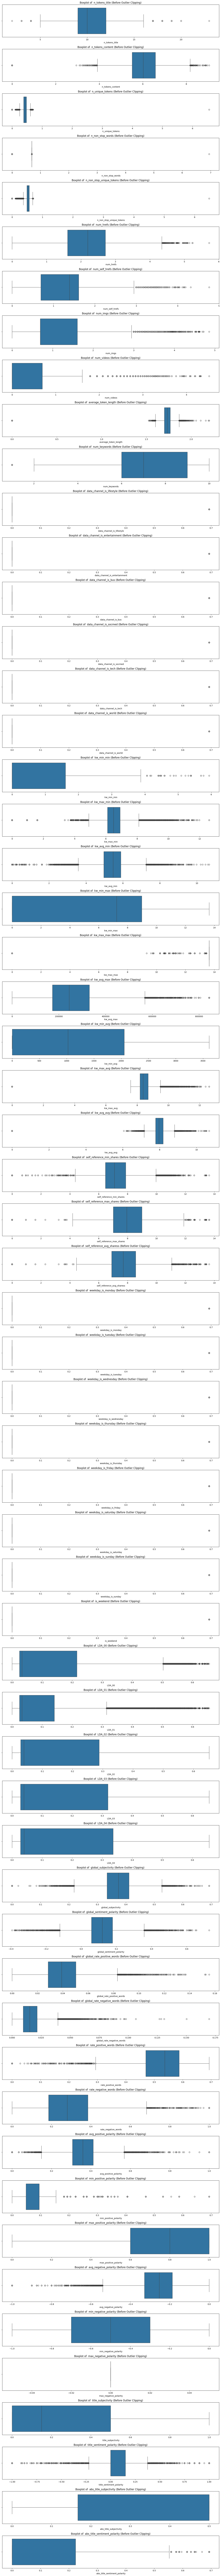

In [30]:
# Handle Outliers using IQR method
# Visualize features before outlier handling
# Plot boxplots for all numerical features
plt.figure(figsize=(15, len(numerical_features) * 3))  # Adjust height based on number of features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=features_raw[feature])
    plt.title(f'Boxplot of {feature} (Before Outlier Clipping)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [31]:
# Apply IQR-based clipping
Q1 = features_raw.quantile(0.25)
Q3 = features_raw.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
features_raw = features_raw.clip(lower=lower_bound, upper=upper_bound, axis=1)

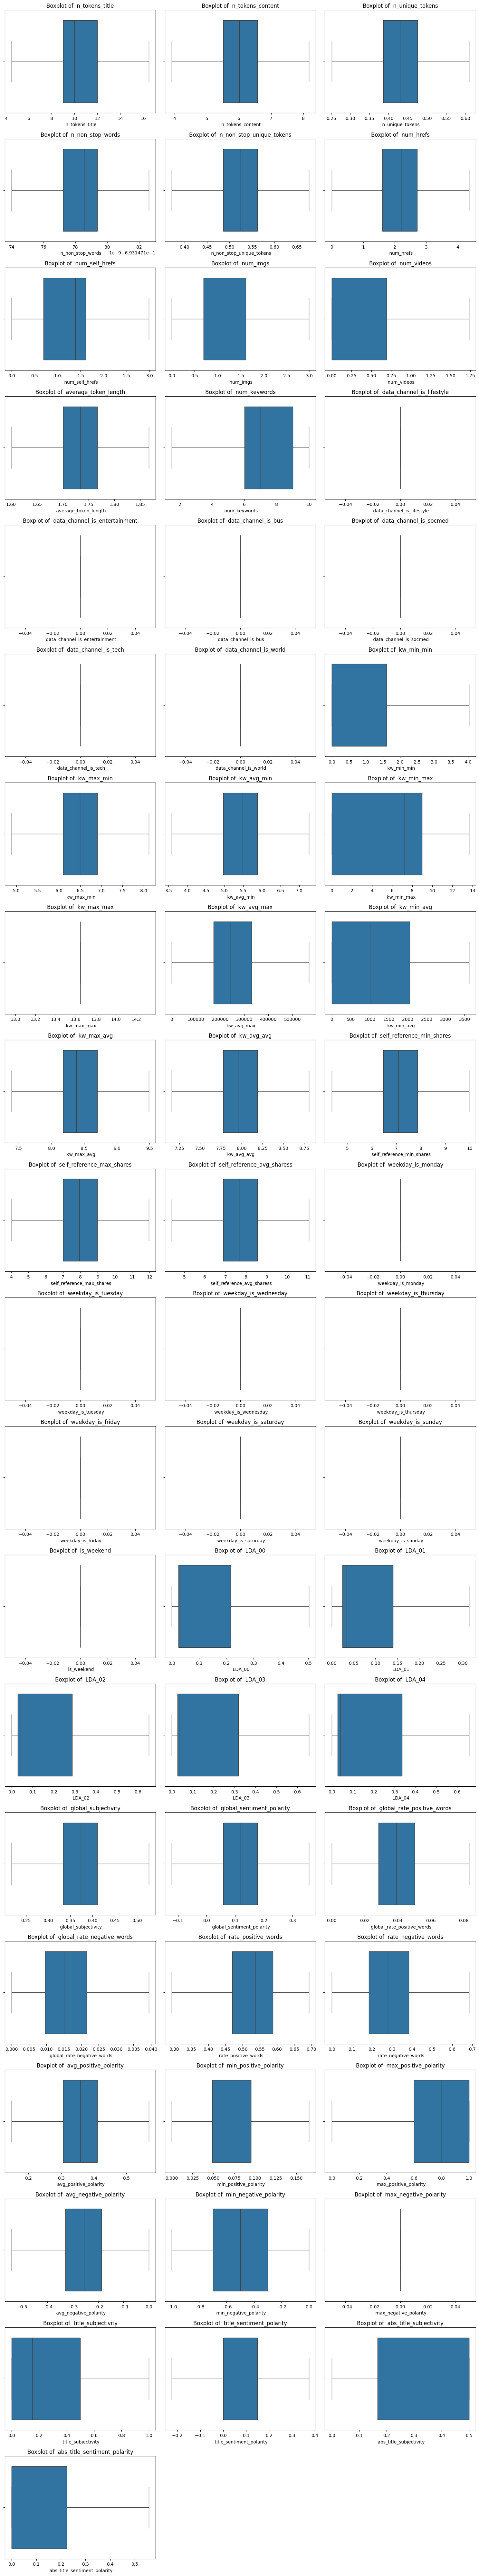

In [32]:

import math

# Determine the number of rows needed (3 plots per row)
num_features = len(numerical_features)
num_cols = 3  # 3 plots per row
num_rows = math.ceil(num_features / num_cols)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=features_raw[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()


In [33]:
skewness = features_raw[numerical_features].skew().sort_values(ascending=False)

# Display the skewness values
print("\n **Skewness of Numerical Features:**")
print(skewness)


 **Skewness of Numerical Features:**
num_videos                       1.302229
LDA_01                           1.280825
kw_min_min                       1.261113
LDA_00                           1.233282
LDA_02                           1.154384
abs_title_sentiment_polarity     1.129325
LDA_03                           1.107867
LDA_04                           1.014267
num_imgs                         0.828338
kw_max_avg                       0.820011
title_subjectivity               0.816085
title_sentiment_polarity         0.536174
global_rate_negative_words       0.504888
kw_min_avg                       0.467976
kw_avg_max                       0.360348
rate_negative_words              0.229915
kw_avg_avg                       0.190277
min_positive_polarity            0.184776
n_tokens_title                   0.136293
global_rate_positive_words       0.079433
global_sentiment_polarity        0.074485
avg_negative_polarity            0.004681
data_channel_is_entertainment    0.000

In [34]:
data_cleaned =data.copy()

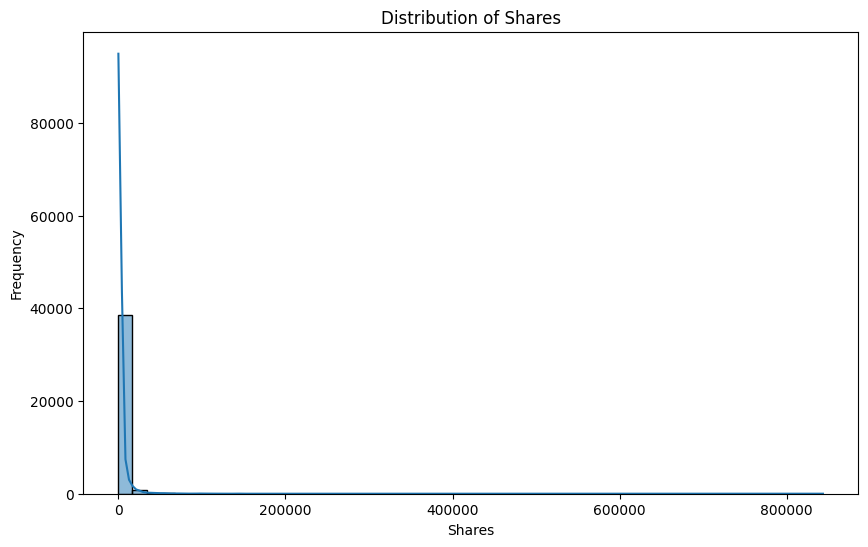

In [35]:
# Distribution of shares
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

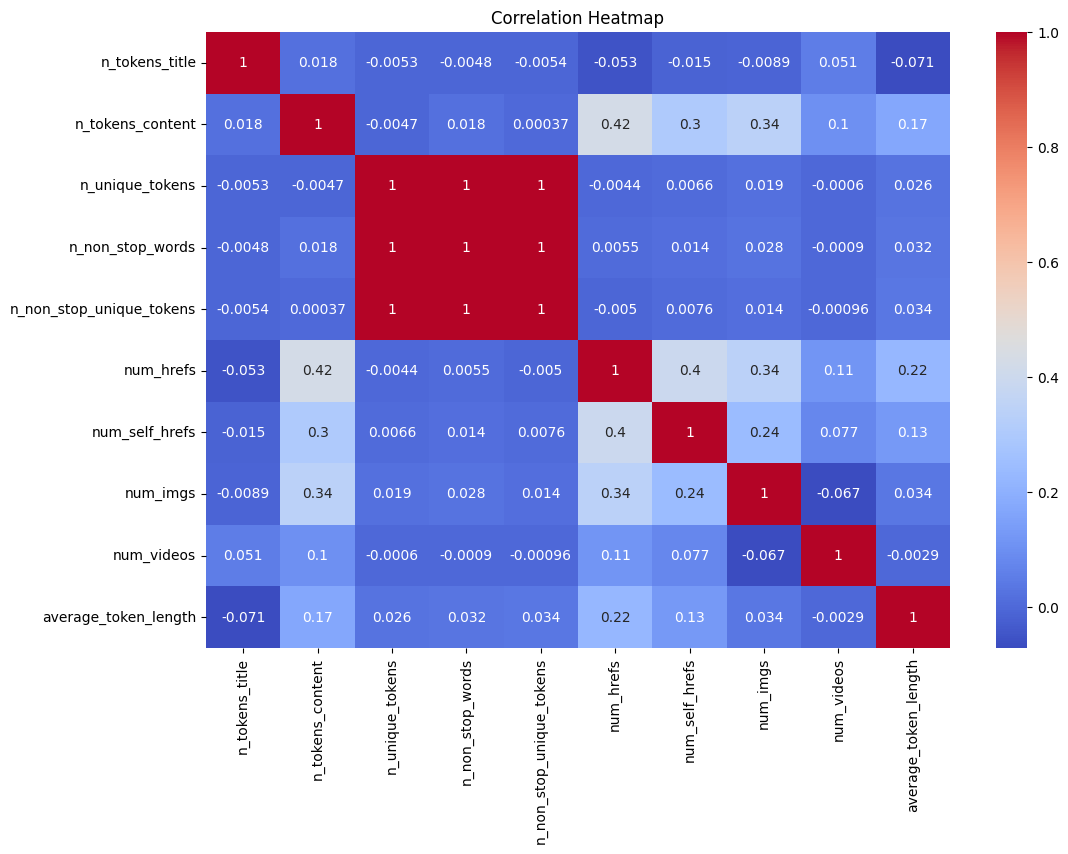

In [36]:
# Correlation heatmap of a subset of features
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.iloc[:, 2:12].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:

# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation with 'shares'
print(correlation_matrix['shares'].sort_values(ascending=False))


shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

In [38]:
data_cleaned[['n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens', 'shares']].corr()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,shares
n_unique_tokens,1.000000,0.999572,0.999852,0.000806
n_non_stop_words,0.999572,1.000000,0.999532,0.000443
n_non_stop_unique_tokens,0.999852,0.999532,1.000000,0.000114
shares,0.000806,0.000443,0.000114,1.000000


In [39]:
data_cleaned.drop(columns=['n_non_stop_words','n_non_stop_unique_tokens'],inplace=True) 

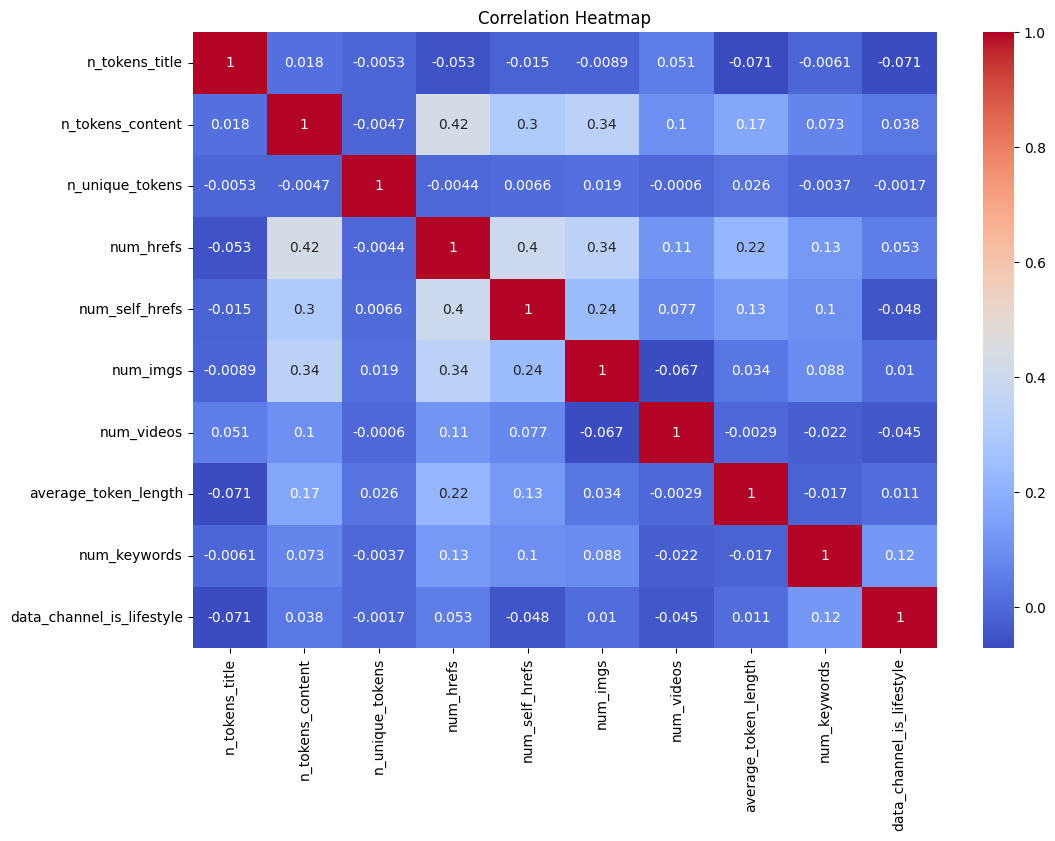

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.iloc[:, 2:12].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **7. Feature Engineering**

In [42]:
# Process target variable (popular if shares >= 1400)
popularity_raw = data['shares']
label_encoder = LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw >= 1400))
print("Class distribution:\n", popular_label.value_counts())

Class distribution:
 1    21154
0    18490
Name: count, dtype: int64


In [43]:
# Identify categorical features
categorical_features = data_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features:", categorical_features)


Categorical Features: ['url']


In [44]:
data_cleaned.drop(columns=['url'],inplace=True) 

## **8. Feature Selection:**

In [46]:
X = data_cleaned.drop(columns=['shares'])  
y = data_cleaned['shares']

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif
# Select top k features
selector = SelectKBest(score_func=f_classif, k=25)
X_selected = selector.fit_transform(X, y)

# Create a DataFrame showing feature names, scores, and p-values
feature_scores = pd.DataFrame({
    'Feature': X.columns, 
    'Score': selector.scores_,
})

# Sort features by score in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False)

# Display the top selected features
print("Top Selected Features with Scores:")
print(feature_scores_sorted.head(25))

Top Selected Features with Scores:
                          Feature     Score
24                     kw_avg_avg  2.914700
17                     kw_max_min  2.538373
18                     kw_avg_min  2.519381
23                     kw_max_avg  2.013821
38                         LDA_02  1.890151
15          data_channel_is_world  1.862736
39                         LDA_03  1.709649
11  data_channel_is_entertainment  1.647385
4                       num_hrefs  1.549960
35                     is_weekend  1.523939
22                     kw_min_avg  1.397142
37                         LDA_01  1.360786
42      global_sentiment_polarity  1.329115
41            global_subjectivity  1.316103
8            average_token_length  1.288653
40                         LDA_04  1.250144
21                     kw_avg_max  1.239693
45            rate_positive_words  1.239627
46            rate_negative_words  1.234730
19                     kw_min_max  1.221231
54       title_sentiment_polarity  1.2090

## **9. Split Data into Training and Testing Sets:**

In [92]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    features_raw, popular_label, test_size=0.3, random_state=0
)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (27750, 58)
Testing set size: (11894, 58)


## **9. Feature Scaling:**

In [94]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train_scaled

array([[-1.1391718 ,  0.94652479, -0.79209788, ..., -0.38031985,
         0.83897032, -0.76237047],
       [-0.6636714 , -0.03939495,  0.19588338, ...,  0.81590937,
         0.57427862,  0.34136886],
       [-0.18817099,  1.25680116, -0.84902411, ...,  1.86260995,
         0.83897032,  1.69223662],
       ...,
       [ 0.28732941, -2.60643649, -2.47293755, ..., -1.72607773,
         0.30958691,  2.0829403 ],
       [ 0.76282982,  0.53603105, -0.05155288, ...,  0.21779476,
        -0.21979649, -0.18538113],
       [-0.18817099, -0.9392945 ,  1.0788073 , ...,  1.71308129,
        -1.54325501,  1.0544045 ]])